# Example: read policy scan list file

This example uses the `get_timeseries_from_policy` method to read the output of this policy:

```
    RULE 'listall' list 'all-files'  
    SHOW( varchar(kb_allocated) || ' * ' || varchar(file_size) || ' * ' || varchar(user_id) || ' * ' || fileset_name || ' * ' || varchar(creation_time) )
```

First, the usual loads

In [1]:
%matplotlib nbagg

import matplotlib.pyplot as plt
import sys
sys.path.append("../")
import spectrumscale_utils as su


Now, let's load our policy scan:

In [2]:
header = ["KB_ALLOCATED", "FILE_SIZE", "USER_ID", "FILESET_NAME", "MODIFICATION_DATE", "CREATION_DATE"]
df = su.get_timeseries_from_policy("/home/sala/Work/Data/SwissFEL/list.all-files-20171001_20180817", header)
df.FILE_SIZE /= 1e9
df.head()

,Inode number,gen number,Snapshot ID,KB_ALLOCATED,FILE_SIZE,USER_ID,FILESET_NAME,MODIFICATION_DATE,MODIFICATION_TIME,CREATION_DATE,CREATION_TIME,Filename
date,,,,,,,,,,,,
2017-11-07 15:35:24.096323,2179428,1262548923,0,91811584,94.014909,16582,bernina-cache-staff,2018-04-06,15:40:07.161456,2017-11-07,15:35:24.096323,/gpfs/photonics/swissfel/raw/bernina-staff/p16...
2017-11-07 15:53:01.363418,2179311,1145704367,0,92158720,94.370383,16582,bernina-cache-staff,2018-04-06,15:40:06.917571,2017-11-07,15:53:01.363418,/gpfs/photonics/swissfel/raw/bernina-staff/p16...
2017-11-07 16:01:43.485388,2179113,1868735669,0,92158720,94.370383,16582,bernina-cache-staff,2018-04-06,15:40:06.453749,2017-11-07,16:01:43.485388,/gpfs/photonics/swissfel/raw/bernina-staff/p16...
2017-11-10 19:15:03.596082,2179175,1100171598,0,0,0.000000,39082,bernina-cache-staff,2018-04-06,15:40:06.595263,2017-11-10,19:15:03.596082,/gpfs/photonics/swissfel/raw/bernina-staff/p16...
2017-11-13 14:05:56.972857,2179330,1846968216,0,15385088,15.754093,16582,bernina-cache-staff,2018-04-06,15:40:06.955545,2017-11-13,14:05:56.972857,/gpfs/photonics/swissfel/raw/bernina-staff/p16...


And, as a simple example, an histogram of file sizes:

<IPython.core.display.Javascript object>


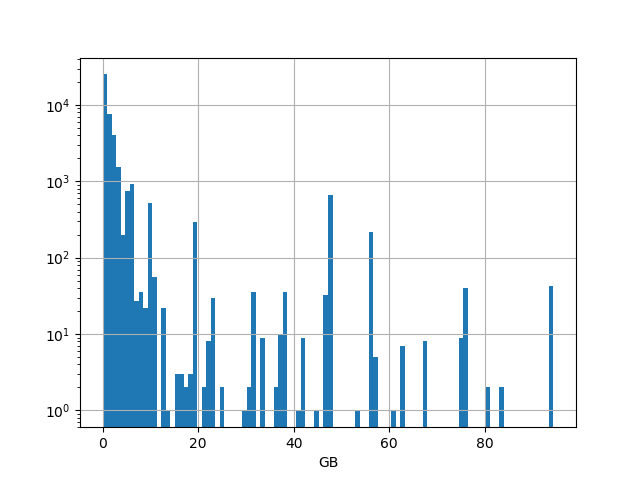

In [3]:
df_r = df[(df.USER_ID != 0) & (df.FILE_SIZE < 100) & (df.FILE_SIZE > 0)]

plt.figure()
ax = df_r["FILE_SIZE"].hist(bins=100)
ax.set_xlabel("GB")
plt.semilogy()
plt.show()